In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load generated data
df = pd.read_csv("housing.csv")

# Feature Engineering
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# Define features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Drop non-numeric columns (or encode them)
X = X.select_dtypes(include=[np.number])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: ₹{mae:,.0f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error: ₹3,852,440
R² Score: 0.934


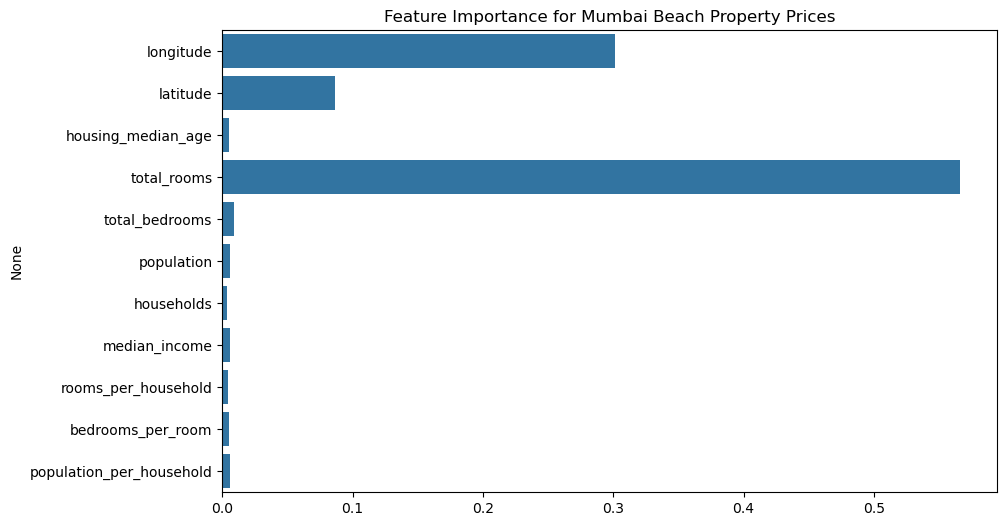

In [6]:
# Plot feature importance
features = X.columns
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Mumbai Beach Property Prices")
plt.show()

In [22]:
# Predict a new property's value
new_property = [[
    72.8180,   # longitude
    19.1230,   # latitude
    5,         # housing_median_age
    6,         # total_rooms (in hundreds)
    1.2,       # total_bedrooms (in hundreds)
    4,         # population (in hundreds)
    2,         # households (in hundreds)
    15.0,      # median_income (lakhs/year)
    0.25,      # rooms_per_household
    0.20,      # bedrooms_per_room
    2.0        # population_per_household
]]

predicted_price = model.predict(new_property)[0]  / 1e7 
print(f"Predicted Price: ₹{predicted_price:,.2f} crore")

Predicted Price: ₹5.70 crore


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [14]:
# Example: Predict for a luxury property (Example #3)
new_property = [[
    72.8400,   # longitude (Gorai)
    19.1500,   # latitude
    2,         # age (years)
    12,        # total_rooms (in hundreds)
    2.4,       # total_bedrooms (in hundreds)
    9,         # population (in hundreds)
    3.0,       # households (in hundreds)
    22.0,      # median_income (₹ lakhs/year)
    4.0,       # rooms_per_household
    0.2,       # bedrooms_per_room
    3.0        # population_per_household
]]

predicted_price = model.predict(new_property)[0] / 1e7  # Convert to crore
print(f"Predicted Price: ₹{predicted_price:.2f} crore") 

Predicted Price: ₹3.80 crore


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
new_property = [[
    76.3423,19.6878,5,8,3,8,3.0,22,6,2,5]]
predicted_price = model.predict(new_property)[0] / 1e7
print (f"prediction price : {predicted_price: .2f} crore ") 

prediction price :  4.26 crore 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
